<a href="https://colab.research.google.com/github/Anishacoding/Tokyo-Olympics-2021-/blob/main/Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arjunprasadsarkhel/2021-olympics-in-tokyo")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/2021-olympics-in-tokyo


In [ ]:
import os
os.listdir(path)


['EntriesGender.xlsx',
 'Teams.xlsx',
 'Athletes.xlsx',
 'Coaches.xlsx',
 'Medals.xlsx']

In [4]:
import pandas as pd
medal_count = pd.read_excel("Medals.xlsx")
medal_count

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


Estimates of Location

In [ ]:
#Mean

medal_count["Total"].mean()

np.float64(11.612903225806452)

Weighted Average= ∑(x
i
​
 ⋅w
i
​
 )
/
∑w
i


where:

𝑥
𝑖
  is each Gold medal count,

𝑤
𝑖
  is the corresponding total medal count.



In [ ]:
# Calculating:
# On average, how many Gold medals are won, weighted by how many medals in total a country won?"
# Weighted Mean
import numpy as np

np.average(medal_count["Gold"], weights = medal_count["Total"])

np.float64(14.743518518518519)

Trimmed Mean: The average of all values after dropping a fixed number of extreme values.

In [ ]:
from scipy.stats import trim_mean
trim_mean(medal_count["Gold"], 0.1) # chopping off the top 10% => 0.1

np.float64(1.96)

Median

In [ ]:
medal_count["Total"].median()

4.0

In [ ]:
#Weighted Median
# What is the Total medal count value such that half of the Gold medals come
# from countries with Total medal count less than or equal to it?

def weighted_median(df, median_col, weight_col):
  df_sorted = df.sort_values(median_col)
  # This gives the "running total" of Gold medals as we go through the sorted rows.
  cumsum = df_sorted[weight_col].cumsum()
  cutoff = df_sorted[weight_col].sum()/2.
  return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(medal_count, "Total", "Gold")

np.int64(40)

In [ ]:
q3 = np.percentile(medal_count["Total"], 75)
q3

np.float64(11.0)

In [ ]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


Estimated of Variablity (Dispersion Metrics)


In [30]:
# Variance

from statistics import variance

medal_count["Gold"].var()

49.31510051425906

In [31]:
# Standard Deviation

from statistics import stdev

stdev(medal_count["Gold"])

7.022471111671375

In [33]:
# Meadian Absolute Deviation

from numpy import median, absolute
median(absolute(medal_count["Gold"] - median(medal_count["Gold"])))

np.float64(1.0)

In [34]:
# interquartile Range

q3, q1 = np.percentile(medal_count["Gold"], [75 ,25])
iqr = q3 - q1
iqr

np.float64(3.0)

Exploring the Data Distribution


<Axes: >

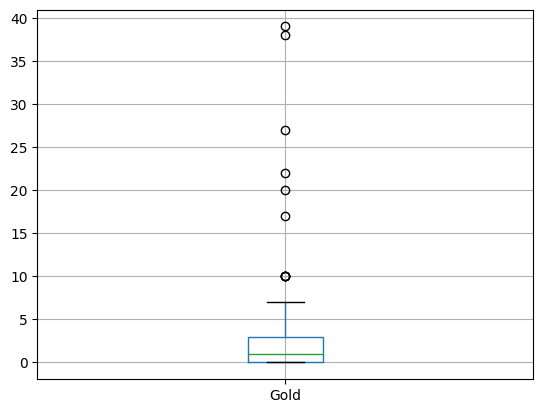

In [40]:
# Box Plots - ref https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html#pandas.DataFrame.boxplot

medal_count.boxplot(column="Gold", by=None, ax=None, fontsize=None, rot=0, layout=None)

# Frequency Table
The goal is to
*   Break Gold medal counts into 10 ranges (bins)
*  Count how many countries fall into each range
* Present that as a frequency distribution table — useful for understanding how Gold medals are *distributed*

In [45]:
# Frequency Table
frequency_table = medal_count.copy()
frequency_table['freq'] = pd.cut(medal_count["Gold"], 10)
frequency_table.groupby('freq')['Rank'].count().reset_index()

/tmp/ipython-input-45-1635374378.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_table.groupby('freq')['Rank'].count().reset_index()


,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <BarContainer object of 30 artists>)

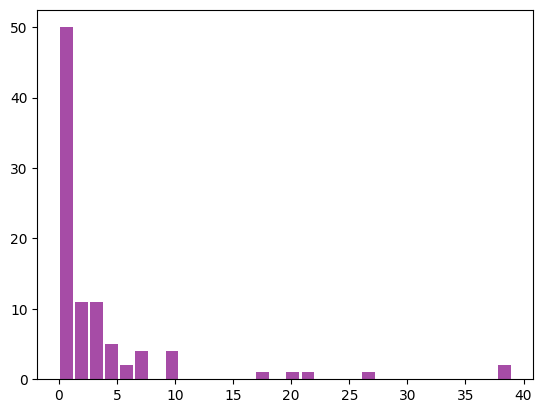

In [50]:
# Histogram ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
import matplotlib.pyplot as plt

plt.hist(x=medal_count['Gold'], bins='auto', color='purple',
         alpha = 0.7, rwidth=0.85)

Text(0.5, 0, 'Gold Medals')

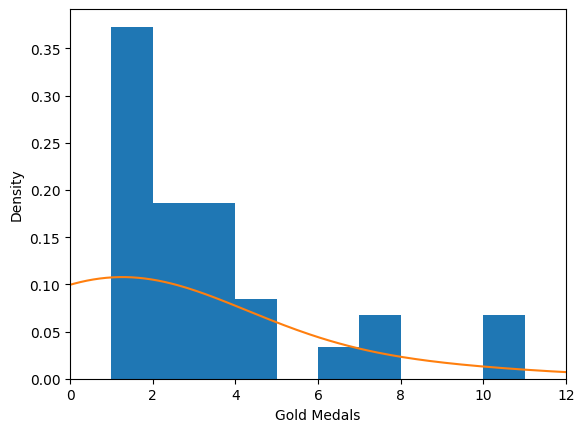

In [52]:
# Density Plot and estimates
ax = medal_count['Gold'].plot.hist(density = True, xlim=[0,12], bins = range(1,13))
medal_count['Gold'].plot.density(ax=ax)
ax.set_xlabel('Gold Medals')

Exploring Binary and Categorical Daye

In [8]:
medal_count['Bronze'].mode()

,Bronze
0,1


Text(0, 0.5, 'Gold Medals')

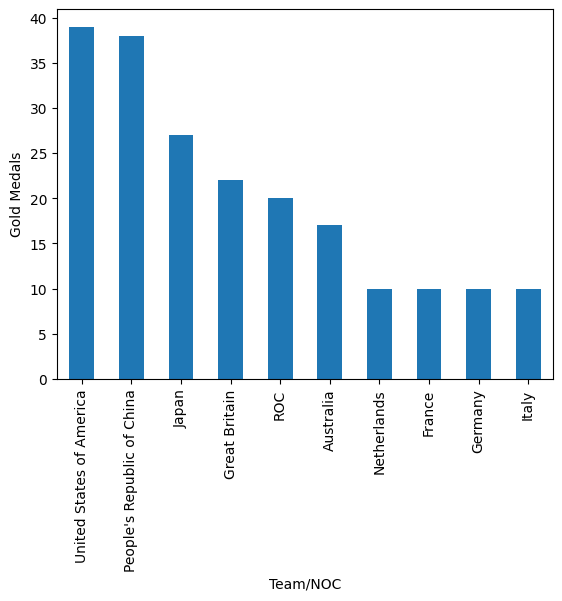

In [13]:
#Bar plot
ax = medal_count.iloc[:10, :].plot.bar(x = "Team/NOC", y = 'Gold', legend = False)
ax.set_xlabel('Team/NOC')
ax.set_ylabel('Gold Medals')

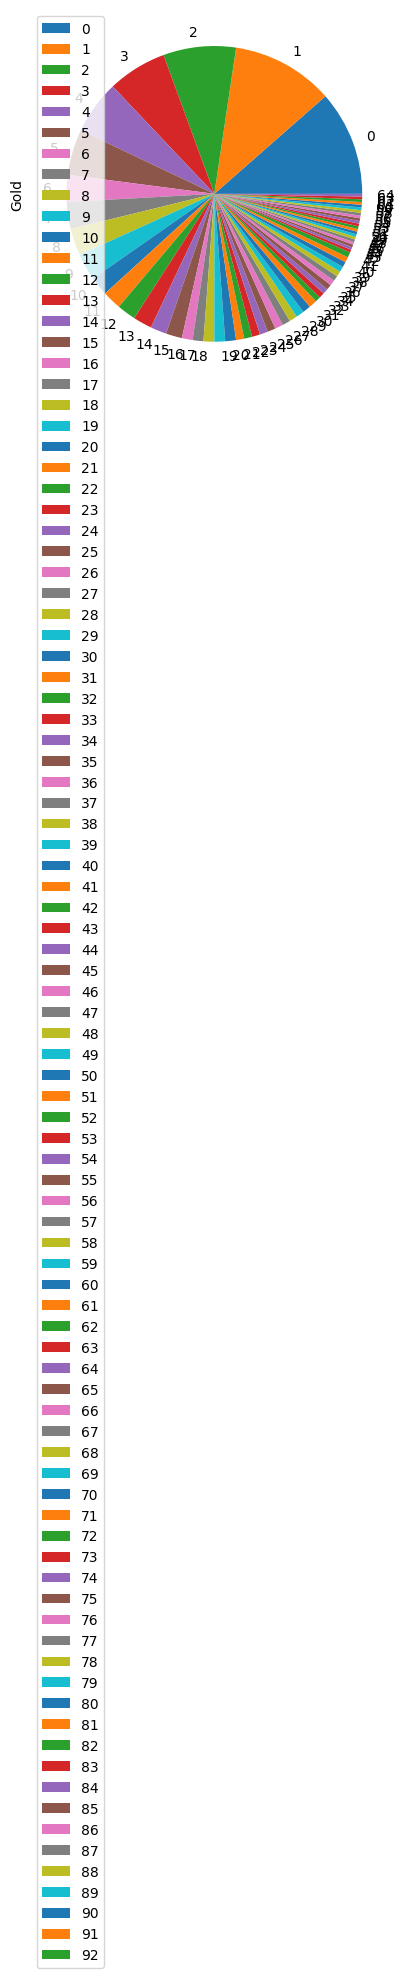

In [17]:
# Pie chart - not recommened for these kinds of data

ax = medal_count.plot.pie(y = 'Gold')

<Axes: xlabel='Gold', ylabel='Silver'>

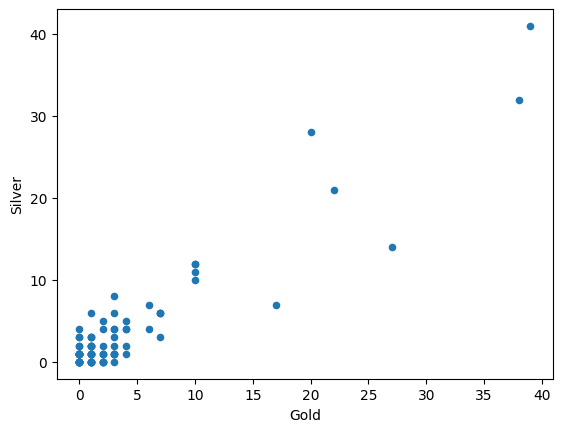

In [21]:
medal_count.plot.scatter(x = 'Gold', y = 'Silver')

<Axes: xlabel='Gold', ylabel='Silver'>

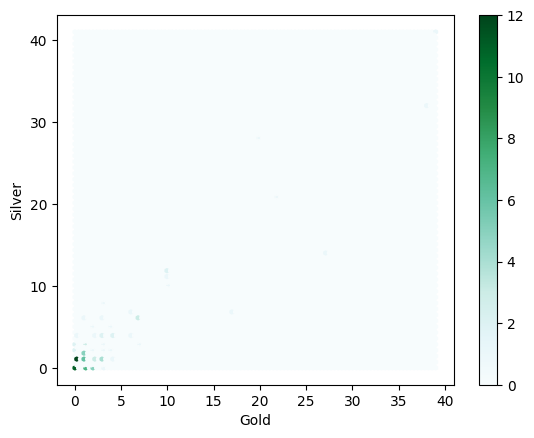

In [23]:
medal_count.plot.hexbin(x = 'Gold', y = 'Silver')

**Plots a 2D kernel density estimate (KDE) showing how Gold and Silver medal counts are jointly distributed.**

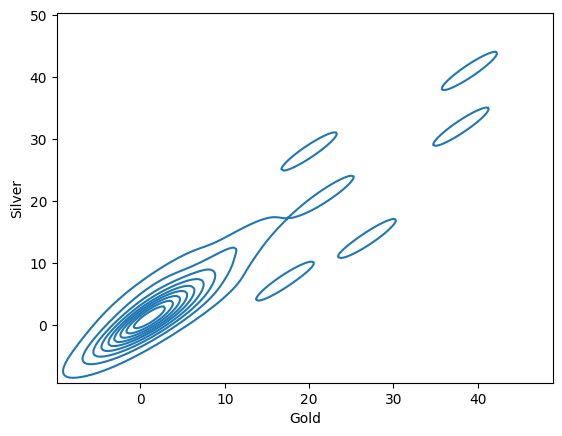

In [27]:
import seaborn as sns

ax = sns.kdeplot(x=medal_count['Gold'], y=medal_count['Silver'])

**Contingency Table**

aggfunc=lambda x: len(x):

Counts how many rows (countries) have each Silver–Gold medal combination
Essentially builds a frequency count for each (Silver, Gold) pair

This pivot table answers the question:

**How many countries have exactly X Silver medals and Y Gold medals?**

In [37]:
crosstab = medal_count[['Silver', 'Gold']].pivot_table(
    index='Silver',
    columns='Gold',
    aggfunc=lambda x: len(x),
    margins=True
)
crosstab.fillna(0)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<Axes: xlabel='Gold'>

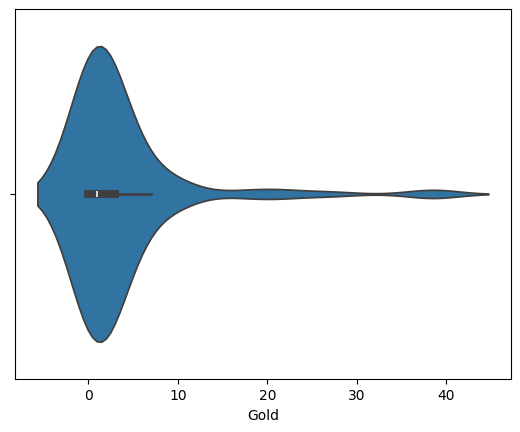

In [38]:
# Violin Plot

sns.violinplot(x=medal_count['Gold'])

<Axes: >

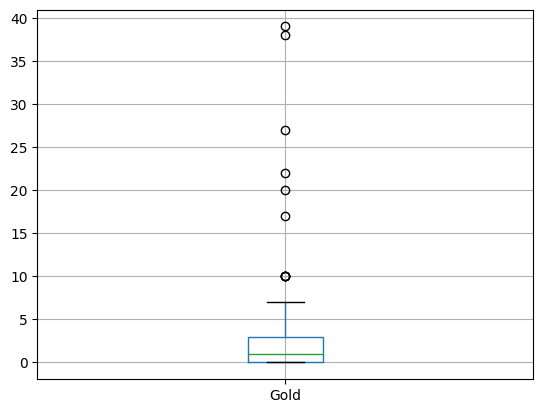

In [41]:
medal_count.boxplot(column='Gold')